<a href="https://colab.research.google.com/github/mahdie-1993/Machine_learning_with_Python_project/blob/main/CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing pandas
import pandas as pd
# importing numpy
import numpy as np
# importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
# reading dataset
df = pd.read_csv('/content/16325569497737558 (1).csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
to_drop = ['oldpeak','slp','thall']
df.drop(to_drop, inplace=True, axis=1)

In [ ]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

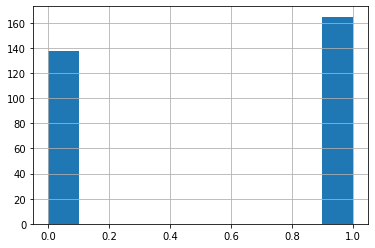

In [ ]:
df['output'].hist()

In [ ]:
import matplotlib.pyplot as plt

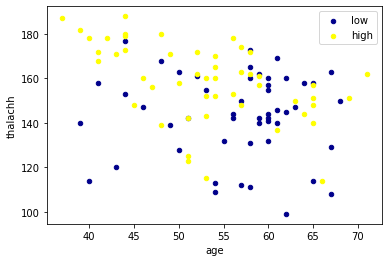

In [ ]:
ax = df[df['output'] == 0][0:50].plot(kind='scatter', x='age', y='thalachh', color='DarkBlue', label='low');
df[df['output'] == 1][0:50].plot(kind='scatter', x='age', y='thalachh', color='Yellow', label='high', ax=ax);
plt.show()

In [ ]:
df.size

3333

In [ ]:
df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
caa         int64
output      int64
dtype: object

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
caa         0
output      0
dtype: int64

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'],
      dtype='object')

In [ ]:
X = np.asarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'caa']])
X[0:5]

array([[ 63,   1,   3, 145, 233,   1,   0, 150,   0,   0],
       [ 37,   1,   2, 130, 250,   0,   1, 187,   0,   0],
       [ 41,   0,   1, 130, 204,   0,   0, 172,   0,   0],
       [ 56,   1,   1, 120, 236,   0,   1, 178,   0,   0],
       [ 57,   0,   0, 120, 354,   0,   1, 163,   1,   0]])

In [ ]:
y = np.asarray(df['output'])
y [0:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.95,  0.68,  1.97,  0.76, -0.26,  2.39, -1.01,  0.02, -0.7 ,
        -0.71],
       [-1.92,  0.68,  1.  , -0.09,  0.07, -0.42,  0.9 ,  1.63, -0.7 ,
        -0.71],
       [-1.47, -1.47,  0.03, -0.09, -0.82, -0.42, -1.01,  0.98, -0.7 ,
        -0.71],
       [ 0.18,  0.68,  0.03, -0.66, -0.2 , -0.42,  0.9 ,  1.24, -0.7 ,
        -0.71],
       [ 0.29, -1.47, -0.94, -0.66,  2.08, -0.42,  0.9 ,  0.58,  1.44,
        -0.71]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 10) (242,)
Test set: (61, 10) (61,)


## **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [ ]:
yhat = LR.predict(X_test)
print(yhat)
print(y_test)

[1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]


In [ ]:
yhat_prob = LR.predict_proba(X_test)


## **jaccard_score**

Jaccard similarity coefficient score.

The Jaccard index, or Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels in y_true.


***sklearn.metrics.jaccard_score***(**y_true**, **y_pred**, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
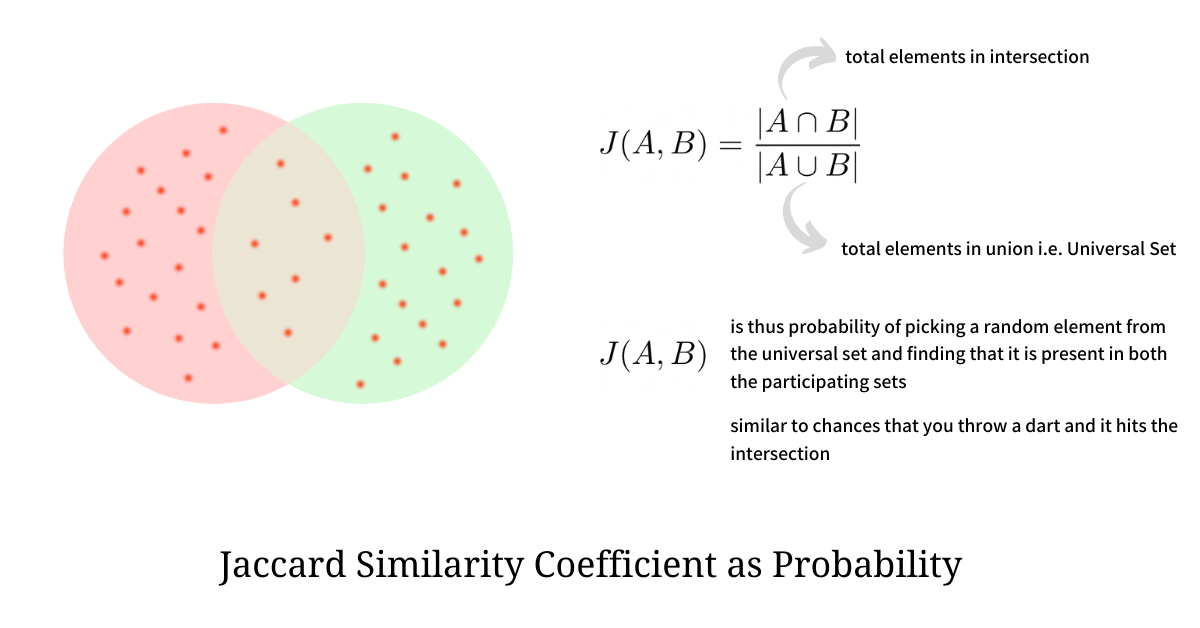

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0) #برای جواب صفر

0.7407407407407407

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 5 20]]


Confusion matrix, without normalization
[[34  2]
 [ 5 20]]


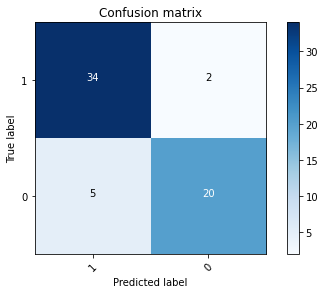

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

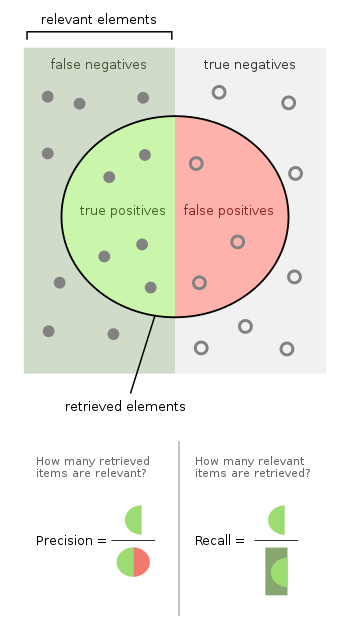

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.47400719287898124

## **SVM**

In [ ]:
from sklearn import svm
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
   clf = svm.SVC(kernel=kernel)
   clf.fit(X_train, y_train) 


In [ ]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 0, 0, 1, 1])

In [ ]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  3]
 [ 4 21]]


Confusion matrix, without normalization
[[33  3]
 [ 4 21]]


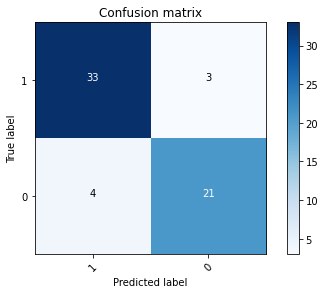

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61



In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8848609284270637

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.825

## **DecisionTree**

In [ ]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
predTree = model.predict(X_test)

In [ ]:
print (predTree [0:15])
print (y_test [0:15])


[1 0 1 1 0 0 0 1 1 1 1 1 1 0 0]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1]


In [ ]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.819672131147541


In [ ]:
jaccard_score(y_test, predTree,pos_label=1)

0.717948717948718

In [ ]:
print(confusion_matrix(y_test, predTree, labels=[1,0]))

[[28  8]
 [ 3 22]]
